<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/TINKER_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tinker-docs.thinkingmachines.ai/

In [9]:
import torch

if torch.cuda.is_available():
    print("CUDA is available! PyTorch can access your GPU.")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / (1024**3):.2f} GB")
else:
    print("CUDA is NOT available. PyTorch cannot access a GPU.")
    print("Please ensure your Colab runtime type is set to GPU (Runtime -> Change runtime type -> Hardware accelerator: GPU).")

CUDA is available! PyTorch can access your GPU.
GPU Name: NVIDIA A100-SXM4-40GB
GPU Memory: 39.56 GB


In [ ]:
!pip install tinker -q

In [ ]:
!git clone https://github.com/thinking-machines-lab/tinker-cookbook.git
%cd tinker-cookbook
# Switch to your virtual environment
!pip install -e .

In [3]:
!pip show tinker

Name: tinker
Version: 0.7.0
Summary: The official Python SDK for the tinker API
Home-page: https://thinkingmachines.ai/tinker
Author: 
Author-email: Tinker authors <tinker@thinkingmachines.ai>
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: anyio, click, distro, httpx, numpy, pydantic, rich, sniffio, torch, transformers, typing-extensions
Required-by: tinker_cookbook


In [4]:
import os
import tinker
from google.colab import userdata
from tinker import types

# --- 1. KEY SETUP (Previously successful) ---
try:
    tinker_key = userdata.get('TINKER_API_KEY')
    if not tinker_key:
        raise ValueError("TINKER_API_KEY secret is empty.")
    os.environ['TINKER_API_KEY'] = tinker_key
except ValueError as e:
    print(f"ERROR: Key Setup Failed: {e}")
    exit()

# --- 2. INITIALIZE AND QUERY MODELS (Corrected Print Loop) ---
print("Initializing Tinker ServiceClient...")
try:
    service_client = tinker.ServiceClient()

    print("Successfully connected. Available base models:")

    supported_models = service_client.get_server_capabilities().supported_models

    # --- CORRECTED LOOP ---
    for item in supported_models:
        # We only use the attribute 'model_name' to ensure compatibility
        print(f"- {item.model_name}")

    # --- IMPORTANT NOTE ---
    print("\n-------------------------------------------------")
    print("ACTION REQUIRED: These are base model names (for training),")
    print("NOT the required inference path. Please find your active")
    print("tinker://... SAMPLER PATH from your Tinker console.")

except Exception as e:
    # Catches connection failures if the network drops
    print(f"ERROR connecting to Tinker API: {e}")

Initializing Tinker ServiceClient...
Successfully connected. Available base models:
- deepseek-ai/DeepSeek-V3.1
- deepseek-ai/DeepSeek-V3.1-Base
- moonshotai/Kimi-K2-Thinking
- meta-llama/Llama-3.1-70B
- meta-llama/Llama-3.1-8B
- meta-llama/Llama-3.1-8B-Instruct
- meta-llama/Llama-3.2-1B
- meta-llama/Llama-3.2-3B
- meta-llama/Llama-3.3-70B-Instruct
- Qwen/Qwen3-235B-A22B-Instruct-2507
- Qwen/Qwen3-30B-A3B
- Qwen/Qwen3-30B-A3B-Base
- Qwen/Qwen3-30B-A3B-Instruct-2507
- Qwen/Qwen3-32B
- Qwen/Qwen3-4B-Instruct-2507
- Qwen/Qwen3-8B
- Qwen/Qwen3-8B-Base
- Qwen/Qwen3-VL-235B-A22B-Instruct
- Qwen/Qwen3-VL-30B-A3B-Instruct
- openai/gpt-oss-120b
- openai/gpt-oss-20b

-------------------------------------------------
ACTION REQUIRED: These are base model names (for training),
NOT the required inference path. Please find your active
tinker://... SAMPLER PATH from your Tinker console.


In [5]:
import tinker
service_client = tinker.ServiceClient()
print("Available models:")
for item in service_client.get_server_capabilities().supported_models:
    print("- " + item.model_name)

Available models:
- deepseek-ai/DeepSeek-V3.1
- deepseek-ai/DeepSeek-V3.1-Base
- moonshotai/Kimi-K2-Thinking
- meta-llama/Llama-3.1-70B
- meta-llama/Llama-3.1-8B
- meta-llama/Llama-3.1-8B-Instruct
- meta-llama/Llama-3.2-1B
- meta-llama/Llama-3.2-3B
- meta-llama/Llama-3.3-70B-Instruct
- Qwen/Qwen3-235B-A22B-Instruct-2507
- Qwen/Qwen3-30B-A3B
- Qwen/Qwen3-30B-A3B-Base
- Qwen/Qwen3-30B-A3B-Instruct-2507
- Qwen/Qwen3-32B
- Qwen/Qwen3-4B-Instruct-2507
- Qwen/Qwen3-8B
- Qwen/Qwen3-8B-Base
- Qwen/Qwen3-VL-235B-A22B-Instruct
- Qwen/Qwen3-VL-30B-A3B-Instruct
- openai/gpt-oss-120b
- openai/gpt-oss-20b


In [6]:
base_model = "Qwen/Qwen3-VL-30B-A3B-Instruct"
training_client = service_client.create_lora_training_client(
    base_model=base_model
)

In [ ]:
# Create some training examples
examples = [
    {
        "input": "banana split",
        "output": "anana-bay plit-say"
    },
    {
        "input": "quantum physics",
        "output": "uantum-qay ysics-phay"
    },
    {
        "input": "donut shop",
        "output": "onut-day op-shay"
    },
    {
        "input": "pickle jar",
        "output": "ickle-pay ar-jay"
    },
    {
        "input": "space exploration",
        "output": "ace-spay exploration-way"
    },
    {
        "input": "rubber duck",
        "output": "ubber-ray uck-day"
    },
    {
        "input": "coding wizard",
        "output": "oding-cay izard-way"
    },
]

# Convert examples into the format expected by the training client
from tinker import types

# Get the tokenizer from the training client
tokenizer = training_client.get_tokenizer()

def process_example(example: dict, tokenizer) -> types.Datum:
    # Format the input with Input/Output template
    # For most real use cases, you'll want to use a renderer / chat template,
    # (see later docs) but here, we'll keep it simple.
    prompt = f"English: {example['input']}\nPig Latin:"

    prompt_tokens = tokenizer.encode(prompt, add_special_tokens=True)
    prompt_weights = [0] * len(prompt_tokens)
    # Add a space before the output string, and finish with double newline
    completion_tokens = tokenizer.encode(f" {example['output']}\n\n", add_special_tokens=False)
    completion_weights = [1] * len(completion_tokens)

    tokens = prompt_tokens + completion_tokens
    weights = prompt_weights + completion_weights

    input_tokens = tokens[:-1]
    target_tokens = tokens[1:] # We're predicting the next token, so targets need to be shifted.
    weights = weights[1:]

    # A datum is a single training example for the loss function.
    # It has model_input, which is the input sequence that'll be passed into the LLM,
    # loss_fn_inputs, which is a dictionary of extra inputs used by the loss function.
    return types.Datum(
        model_input=types.ModelInput.from_ints(tokens=input_tokens),
        loss_fn_inputs=dict(weights=weights, target_tokens=target_tokens)
    )

processed_examples = [process_example(ex, tokenizer) for ex in examples]

# Visualize the first example for debugging purposes
datum0 = processed_examples[0]
print(f"{'Input':<20} {'Target':<20} {'Weight':<10}")
print("-" * 50)
for i, (inp, tgt, wgt) in enumerate(zip(datum0.model_input.to_ints(), datum0.loss_fn_inputs['target_tokens'].tolist(), datum0.loss_fn_inputs['weights'].tolist())):
    print(f"{repr(tokenizer.decode([inp])):<20} {repr(tokenizer.decode([tgt])):<20} {wgt:<10}")

In [8]:
import requests
import tinker
from transformers import AutoTokenizer

model_name = "Qwen/Qwen3-VL-30B-A3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)

service_client = tinker.ServiceClient()
training_client = await service_client.create_lora_training_client_async(base_model=model_name, rank=32)
sampling_client = await training_client.save_weights_and_get_sampling_client_async(name="sampler")

# Grab an image and ask a question
# The previous images resulted in 'Asset is not a valid image' error.
# Using a very basic and widely compatible PNG from W3C.
image_data = requests.get("https://www.w3.org/html/logo/downloads/HTML5_Badge_256.png").content
model_input = tinker.ModelInput(chunks=[
    tinker.types.EncodedTextChunk(tokens=tokenizer.encode("<|im_start|>user\n<|vision_start|>", add_special_tokens=False)),
    tinker.types.ImageChunk(data=image_data, format="png"),
    tinker.types.EncodedTextChunk(tokens=tokenizer.encode("<|vision_end|>What is this?<|im_end|>\n<|im_start|>assistant\n", add_special_tokens=False)),
])

result = await sampling_client.sample_async(prompt=model_input, num_samples=1, sampling_params=tinker.types.SamplingParams(max_tokens=100))
print(tokenizer.decode(result.sequences[0].tokens))

This is the logo for CSS (Cascading Style Sheets). It's a style sheet language used for describing the presentation of a document written in HTML or XML. The logo prominently features the number 5, which is why it’s often referred to as the "CSS 5" logo, though CSS is actually the standard for styling web content.<|im_end|>


In [10]:
import tinker
from tinker import types
# Assuming 'training_client' and 'processed_examples' are defined
# from the previous cells.

# --- 1. DEFINE HYPERPARAMETERS AND OPTIMIZER CONFIG ---
learning_rate = 2e-4
batch_size = 2
epochs = 10
# This is required by forward_backward()
loss_fn = "cross_entropy"
# This is the actual key the Tinker API uses for the scalar loss
LOSS_KEY = 'loss:sum'

# Define the AdamParams object (hyperparameter passing fix)
adam_params = types.AdamParams(learning_rate=learning_rate)

# --- 2. START THE TRAINING LOOP ---
print(f"Starting fine-tuning for {epochs} epoch(s) on the Pig Latin task...")

for epoch in range(epochs):
    epoch_loss = 0.0
    num_steps = 0

    # Iterate over batches of processed examples
    for i in range(0, len(processed_examples), batch_size):
        batch = processed_examples[i:i + batch_size]

        # CORE TRAINING STEP 1: Compute Gradients (forward_backward)
        loss_future = training_client.forward_backward(
            data=batch,
            loss_fn=loss_fn
        )

        # Wait for the result and accumulate loss
        output = loss_future.result()

        # Access loss using the discovered key 'loss:sum'
        loss = output.metrics[LOSS_KEY]

        epoch_loss += loss
        num_steps += 1

        # CORE TRAINING STEP 2: Update Model Weights (optim_step)
        training_client.optim_step(adam_params=adam_params).result()

        if num_steps % 2 == 0:
            print(f"  > Epoch {epoch+1}, Step {num_steps}: Loss = {loss:.4f}")

    print(f"Epoch {epoch+1} finished. Avg Loss: {epoch_loss / num_steps:.4f}")

print("\n--- Training complete. Creating Sampling Client. ---")


# --- 3. SAMPLING (INFERENCE) ---

# Create sampling client from the fine-tuned training client by saving its weights.
# The 'name' argument will be used to identify the deployed adapter in Tinker.
sampler = await training_client.save_weights_and_get_sampling_client_async(name="qwen-piglatin-finetune")

# Define input prompt to test the Pig Latin skill
test_input = "English: coding wizard\nPig Latin:"

# Convert test_input string to ModelInput object for sampling
test_input_model_input = tinker.types.ModelInput(chunks=[
    tinker.types.EncodedTextChunk(tokens=tokenizer.encode(test_input, add_special_tokens=True))
])

# Configure sampling parameters
sampling_params = types.SamplingParams(
    max_tokens=32,
    temperature=0.0
)

# Run inference
print(f"\n--- Testing Fine-Tuned Model ---")
print(f"Prompt: {test_input}")

future = sampler.sample(
    prompt=test_input_model_input,
    num_samples=1, # Added the missing 'num_samples' argument
    sampling_params=sampling_params
)

result = future.result()
print(f"Response: {tokenizer.decode(result.sequences[0].tokens).strip()}")

Starting fine-tuning for 10 epoch(s) on the Pig Latin task...
  > Epoch 1, Step 2: Loss = 12.7133
  > Epoch 1, Step 4: Loss = 5.1065
Epoch 1 finished. Avg Loss: 12.4136
  > Epoch 2, Step 2: Loss = 0.5985
  > Epoch 2, Step 4: Loss = 7.5276
Epoch 2 finished. Avg Loss: 3.1337
  > Epoch 3, Step 2: Loss = 0.0746
  > Epoch 3, Step 4: Loss = 0.2687
Epoch 3 finished. Avg Loss: 0.5923
  > Epoch 4, Step 2: Loss = 2.6252
  > Epoch 4, Step 4: Loss = 0.0992
Epoch 4 finished. Avg Loss: 0.7418
  > Epoch 5, Step 2: Loss = 0.0411
  > Epoch 5, Step 4: Loss = 0.1022
Epoch 5 finished. Avg Loss: 0.5327
  > Epoch 6, Step 2: Loss = 0.1175
  > Epoch 6, Step 4: Loss = 0.0616
Epoch 6 finished. Avg Loss: 0.2451
  > Epoch 7, Step 2: Loss = 0.0330
  > Epoch 7, Step 4: Loss = 0.1456
Epoch 7 finished. Avg Loss: 2.8921
  > Epoch 8, Step 2: Loss = 0.2638
  > Epoch 8, Step 4: Loss = 0.0732
Epoch 8 finished. Avg Loss: 3.9322
  > Epoch 9, Step 2: Loss = 0.0403
  > Epoch 9, Step 4: Loss = 0.0179
Epoch 9 finished. Avg Loss

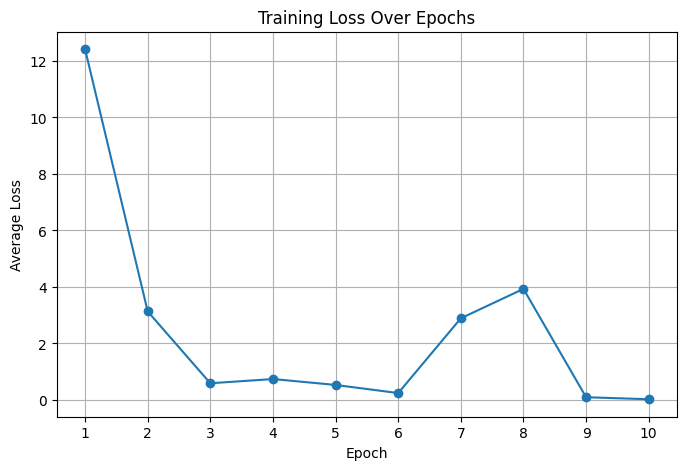

In [12]:
import matplotlib.pyplot as plt

# Data extracted from previous execution output
epochs_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
avg_losses = [12.4136, 3.1337, 0.5923, 0.7418, 0.5327, 0.2451, 2.8921, 3.9322, 0.0978, 0.0276]

plt.figure(figsize=(8, 5))
plt.plot(epochs_data, avg_losses, marker='o', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.xticks(epochs_data)
plt.show()